Some references: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout, https://pbpython.com/categorical-encoding.html, https://www.sharpsightlabs.com/blog/pandas-get-dummies/, https://dataindependent.com/pandas/pandas-get-dummies-pd-get_dummies/#:~:text=In%20this%20case%2C%20you%20need,columns%20of%200s%20and%201s)., https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/, MLNN Lecture 11 code

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data preparation and visualization

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

heart = pd.read_csv('heart.csv')

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
heart = heart.rename(columns=str.lower)
heart.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [ ]:
#numerical_features = [col for col in heart.columns] #List comprehension!
numerical_features = ['age', 'restingbp', 'cholesterol', 'oldpeak', 'maxhr']
binary_features = ['sex', 'fastingbs','exerciseangina']
categorical_features = ['chestpaintype','st_slope', 'restingecg']

In [ ]:
X = heart.drop(['heartdisease'], axis=1)
y = heart.heartdisease

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
  fig, ax = plt.subplots(figsize=(8,4))
  X_train[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
  ax.set_title(feature_name, size=15)
  plt.figtext(1,0.15, X_train[feature_name].describe().round(2).to_string,size=15)


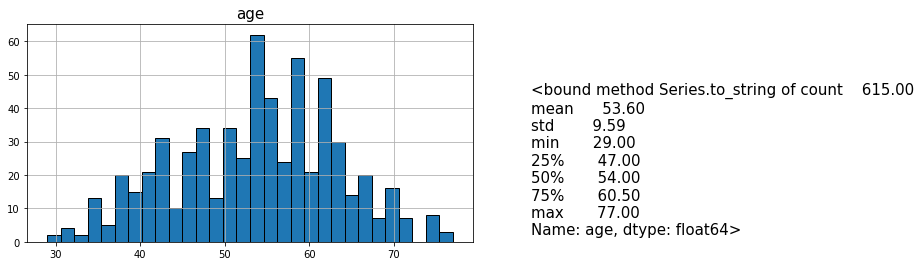

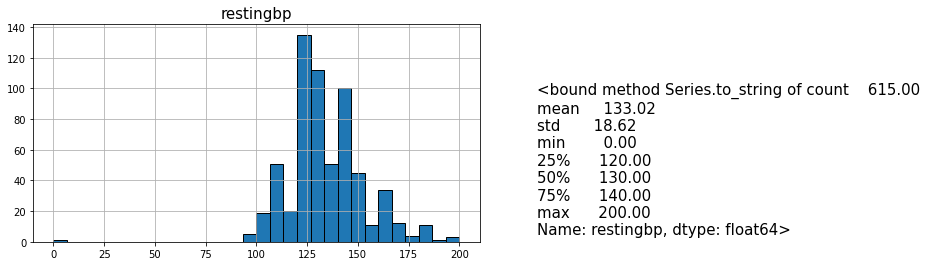

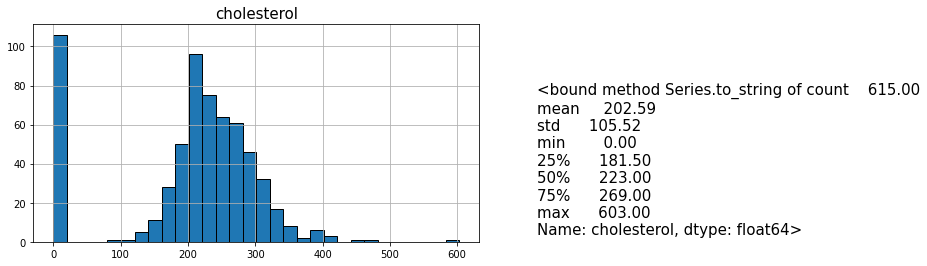

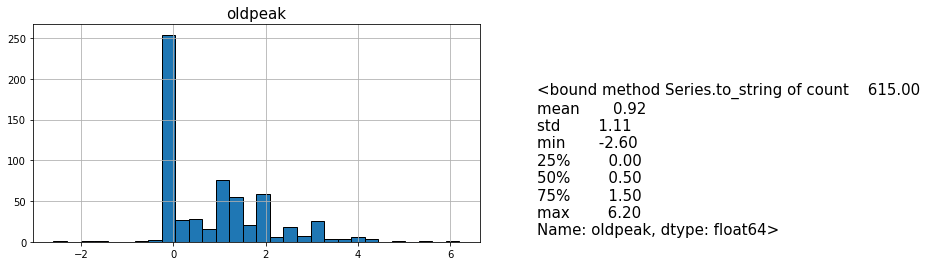

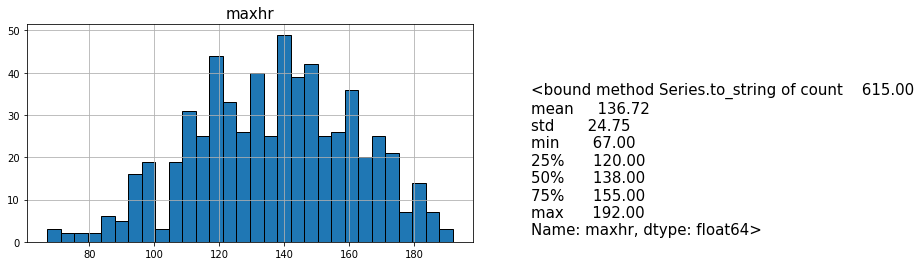

In [ ]:
for x in numerical_features:
  desc_num_feature(x)

In [ ]:
def desc_binary_feature(feature_name, bins=30, edgecolor='k', **kwargs):
  fig, ax = plt.subplots(figsize=(8,4))
  X_train[feature_name].plot.hist()
  ax.set_title(feature_name, size=15)
  plt.figtext(1,0.15, X_train[feature_name].describe().round(2).to_string,size=15)

In [ ]:
heart['sex'].value_counts()

M    725
F    193
Name: sex, dtype: int64

In [ ]:
heart["sex"] = np.where(heart["sex"].str.contains("M"), 1, 0)
heart['sex'].value_counts()

1    725
0    193
Name: sex, dtype: int64

In [ ]:
heart['fastingbs'].value_counts()

0    704
1    214
Name: fastingbs, dtype: int64

In [ ]:
heart['exerciseangina'].value_counts()

N    547
Y    371
Name: exerciseangina, dtype: int64

In [ ]:
heart['exerciseangina'] = np.where(heart["exerciseangina"].str.contains("Y"),1,0)

In [ ]:
heart['exerciseangina'].value_counts()

0    547
1    371
Name: exerciseangina, dtype: int64

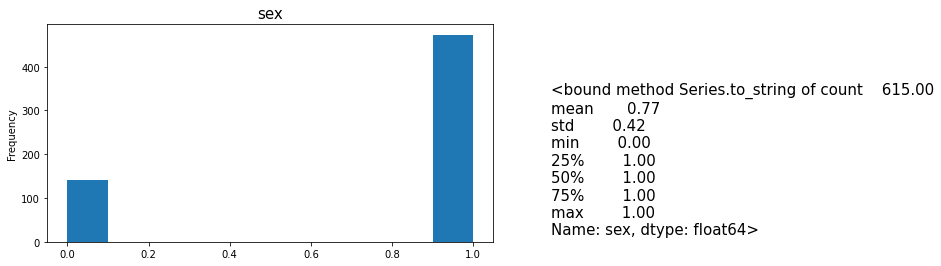

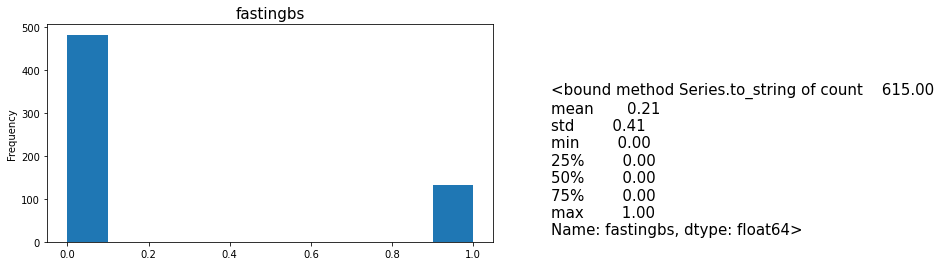

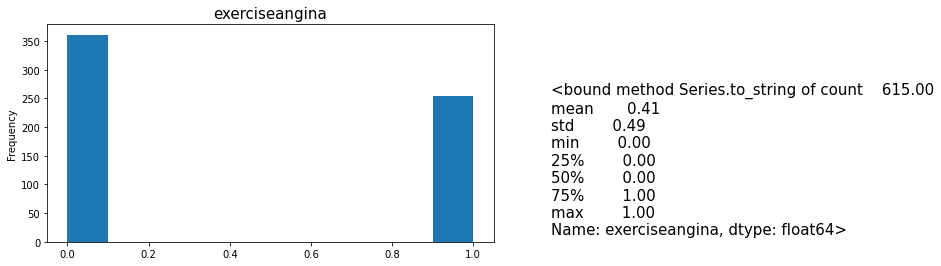

In [ ]:
for x in binary_features:
  desc_binary_feature(x)

In [ ]:
import seaborn as sns

In [ ]:
#colors = ['blue', 'orange']
def desc_target_feature(feature_name, bins=30, edgecolor='k', **kwargs):
  fig, ax = plt.subplots(figsize=(8,4))
  sns.histplot(data=training_data, x=feature_name, hue='heartdisease')
  #X_train[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
  ax.set_title(feature_name, size=15)
  plt.figtext(1,0.15, training_data[feature_name].describe().round(2).to_string,size=15)
  fig.suptitle('')

In [ ]:
training_data = pd.concat([X, y], axis=1, join="inner")

In [ ]:
numerical_features

['age', 'restingbp', 'cholesterol', 'oldpeak', 'maxhr']

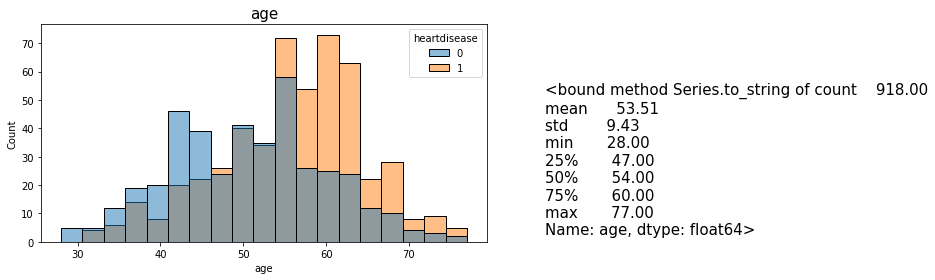

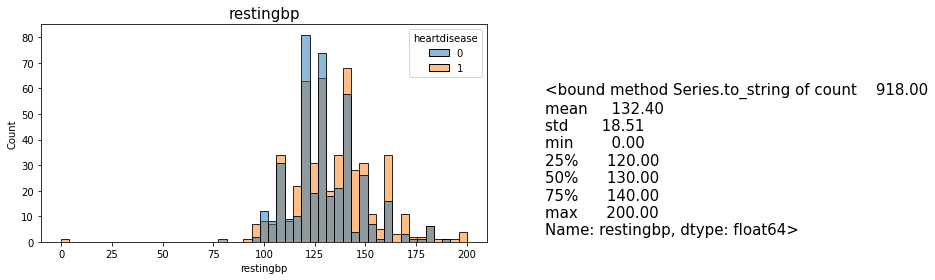

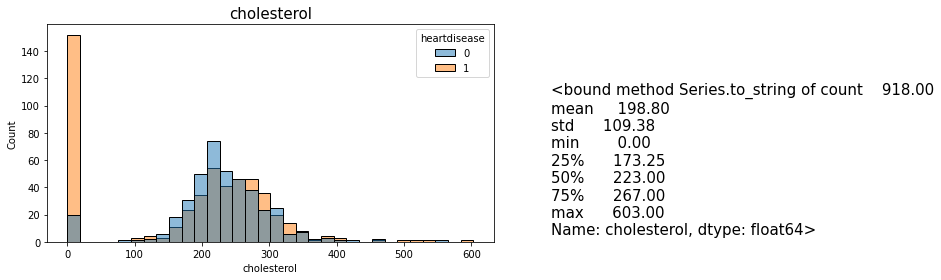

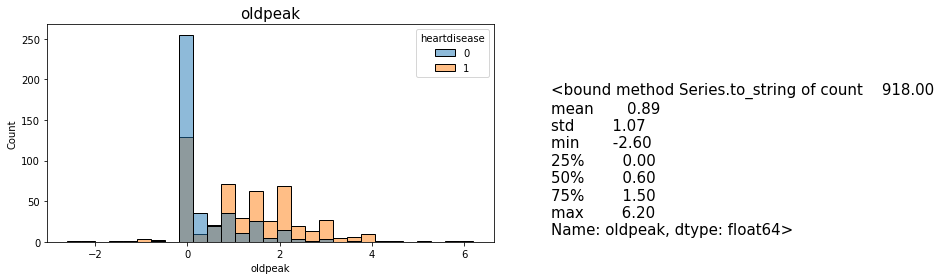

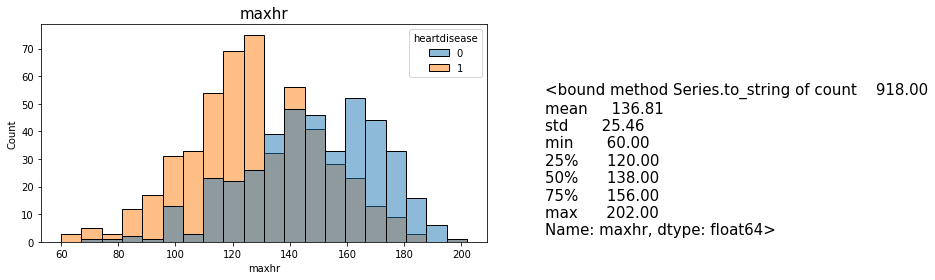

In [ ]:
#desc_features = ['age', 'restingbp', 'chol', 'thalach', 'oldpeak']
for x in numerical_features:
  desc_target_feature(x)

In [ ]:
categorical_features = ['chestpaintype','st_slope', 'restingecg']
training_data['chestpaintype'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: chestpaintype, dtype: int64

In [ ]:
training_data = pd.get_dummies(training_data, columns=["chestpaintype"], drop_first=True)
training_data.head()


,age,sex,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA
0,40,1,140,289,0,Normal,172,0,0.0,Up,0,1,0,0
1,49,0,160,180,0,Normal,156,0,1.0,Flat,1,0,1,0
2,37,1,130,283,0,ST,98,0,0.0,Up,0,1,0,0
3,48,0,138,214,0,Normal,108,1,1.5,Flat,1,0,0,0
4,54,1,150,195,0,Normal,122,0,0.0,Up,0,0,1,0


In [ ]:
training_data['st_slope'].value_counts()

Flat    460
Up      395
Down     63
Name: st_slope, dtype: int64

In [ ]:
training_data = pd.get_dummies(training_data, columns=["st_slope"], drop_first=True)
training_data.head()


,age,sex,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,heartdisease,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,st_slope_Flat,st_slope_Up
0,40,1,140,289,0,Normal,172,0,0.0,0,1,0,0,0,1
1,49,0,160,180,0,Normal,156,0,1.0,1,0,1,0,1,0
2,37,1,130,283,0,ST,98,0,0.0,0,1,0,0,0,1
3,48,0,138,214,0,Normal,108,1,1.5,1,0,0,0,1,0
4,54,1,150,195,0,Normal,122,0,0.0,0,0,1,0,0,1


In [ ]:
training_data['restingecg'].value_counts()

Normal    552
LVH       188
ST        178
Name: restingecg, dtype: int64

In [ ]:
training_data = pd.get_dummies(training_data, columns=["restingecg"], drop_first=True)
training_data.head()


,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,heartdisease,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,st_slope_Flat,st_slope_Up,restingecg_Normal,restingecg_ST
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,1,0


In [ ]:
categorical_features = ['chestpaintype','st_slope', 'restingecg']

In [ ]:
training_data.columns

Index(['age', 'sex', 'restingbp', 'cholesterol', 'fastingbs', 'maxhr',
       'exerciseangina', 'oldpeak', 'heartdisease', 'chestpaintype_ATA',
       'chestpaintype_NAP', 'chestpaintype_TA', 'st_slope_Flat', 'st_slope_Up',
       'restingecg_Normal', 'restingecg_ST'],
      dtype='object')

In [ ]:
len(training_data.columns)

16

In [ ]:
training_data.columns[10:].to_list()

['chestpaintype_NAP',
 'chestpaintype_TA',
 'st_slope_Flat',
 'st_slope_Up',
 'restingecg_Normal',
 'restingecg_ST']

In [ ]:
categorical_features = [feature for feature in training_data.columns[10:].to_list()] #probably didn't need list comprehension here
categorical_features

['chestpaintype_NAP',
 'chestpaintype_TA',
 'st_slope_Flat',
 'st_slope_Up',
 'restingecg_Normal',
 'restingecg_ST']

### Using a neural network to predict heart disease

In [ ]:
X = training_data.drop(['heartdisease'], axis=1)
y = training_data.heartdisease

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(units=(X.shape[1]), activation=tf.nn.relu),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 76ms/step - loss: 6.0373 - accuracy: 0.5350
Epoch 2/100
20/20 [==============================] - 2s 75ms/step - loss: 0.6696 - accuracy: 0.5756
Epoch 3/100
20/20 [==============================] - 2s 76ms/step - loss: 0.6218 - accuracy: 0.6439
Epoch 4/100
20/20 [==============================] - 2s 77ms/step - loss: 0.6640 - accuracy: 0.6276
Epoch 5/100
20/20 [==============================] - 1s 75ms/step - loss: 0.6145 - accuracy: 0.6683
Epoch 6/100
20/20 [==============================] - 1s 75ms/step - loss: 0.5994 - accuracy: 0.6846
Epoch 7/100
20/20 [==============================] - 1s 74ms/step - loss: 0.5921 - accuracy: 0.6992
Epoch 8/100
20/20 [==============================] - 1s 74ms/step - loss: 0.6064 - accuracy: 0.6780
Epoch 9/100
20/20 [==============================] - 2s 98ms/step - loss: 0.5920 - accuracy: 0.7106
Epoch 10/100
20/20 [==============================] - 3s 139ms/step - loss: 0.5916 - accuracy: 0.707

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 15)                240       
                                                                 
 dense_51 (Dense)            (None, 1280)              20480     
                                                                 
 dropout_12 (Dropout)        (None, 1280)              0         
                                                                 
 dense_52 (Dense)            (None, 1280)              1639680   
                                                                 
 dropout_13 (Dropout)        (None, 1280)              0         
                                                                 
 dense_53 (Dense)            (None, 1280)              1639680   
                                                                 
 dropout_14 (Dropout)        (None, 1280)             

Final test accuracy of 86.1%.

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_accuracy:', test_acc)

10/10 [==============================] - 0s 25ms/step - loss: 0.4153 - accuracy: 0.8614
test_accuracy: 0.8613861203193665


### Making predictions with the model

In [ ]:
X_test[:1]

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,st_slope_Flat,st_slope_Up,restingecg_Normal,restingecg_ST
668,63,0,140,195,0,179,0,0.0,1,0,0,0,1,1,0


In [ ]:
model.predict([X_test[:1]])

1/1 [==============================] - 0s 126ms/step


array([[0.0584802]], dtype=float32)

In [ ]:
y_test[0:1]

668    0
Name: heartdisease, dtype: int64

In [ ]:
X_test[1:2]

,age,sex,restingbp,cholesterol,fastingbs,maxhr,exerciseangina,oldpeak,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,st_slope_Flat,st_slope_Up,restingecg_Normal,restingecg_ST
30,53,1,145,518,0,130,0,0.0,0,1,0,1,0,1,0


In [ ]:
y_test[1:2]

30    1
Name: heartdisease, dtype: int64

In [ ]:
model.predict([X_test[1:2]])

1/1 [==============================] - 0s 34ms/step


array([[0.8786742]], dtype=float32)

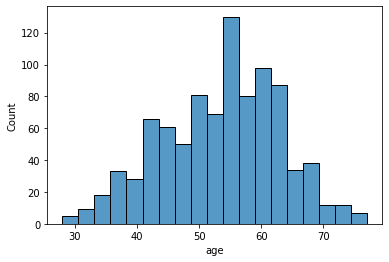

In [ ]:
sns.histplot(data=training_data, x='age')

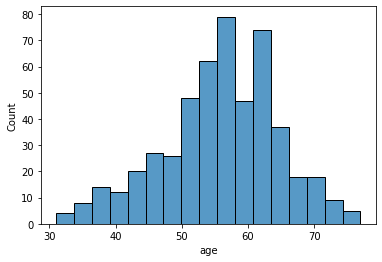

In [ ]:
sns.histplot(data=training_data.where(training_data['heartdisease']==1), x='age')

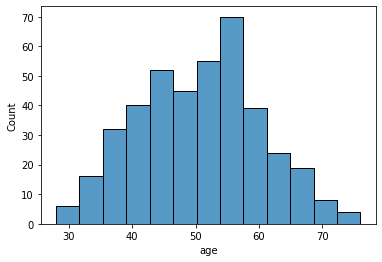

In [ ]:
sns.histplot(data=training_data.where(training_data['heartdisease']==0), x='age')